# 导入需要的库

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from knnClassify import*

# 引入数据集

In [3]:
abalone = pd.read_csv('abalone.data', sep = ',')

# 查abalone.names之后，得到所有的标签：Sex，Length，Diameter，Height，Whole weight，Shucked weight，Viscera weight，Shell weight，Rings

In [4]:
abalone_data = pd.read_csv('abalone.data', names = ["Sex", "Length", "Diameter", "Height", "Whole weight", "Shucked weight", "Viscera weight", "Shell weight", "Rings"], sep = ',')

In [5]:
abalone_data = np.array(abalone_data)
abalone_data

array([['M', 0.455, 0.365, ..., 0.101, 0.15, 15],
       ['M', 0.35, 0.265, ..., 0.0485, 0.07, 7],
       ['F', 0.53, 0.42, ..., 0.1415, 0.21, 9],
       ...,
       ['M', 0.6, 0.475, ..., 0.2875, 0.308, 9],
       ['F', 0.625, 0.485, ..., 0.261, 0.296, 10],
       ['M', 0.71, 0.555, ..., 0.3765, 0.495, 12]], dtype=object)

In [6]:
y = abalone_data[:,0]
Y = abalone_data[:,8]
x = abalone_data[:,1:8]

### y = abalone_data['Rings']
### Y = abalone_data['Sex']
### x = abalone_data[['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight']]

In [7]:
x

array([[0.455, 0.365, 0.095, ..., 0.2245, 0.101, 0.15],
       [0.35, 0.265, 0.09, ..., 0.0995, 0.0485, 0.07],
       [0.53, 0.42, 0.135, ..., 0.2565, 0.1415, 0.21],
       ...,
       [0.6, 0.475, 0.205, ..., 0.5255, 0.2875, 0.308],
       [0.625, 0.485, 0.15, ..., 0.531, 0.261, 0.296],
       [0.71, 0.555, 0.195, ..., 0.9455, 0.3765, 0.495]], dtype=object)

In [8]:
y

array(['M', 'M', 'F', ..., 'M', 'F', 'M'], dtype=object)

In [9]:
set(y)

{'F', 'I', 'M'}

In [10]:
Y

array([15, 7, 9, ..., 9, 10, 12], dtype=object)

In [11]:
set(Y)

{1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 29}

#### 怎么这么多个指标？

### 成效不太好，思考了一下是rings中共有29个分类，然后样本量相较太小了，分类界限太模糊，容易导致分类错误

#### 对rings这个子集数据做了一个小分类，减少分类，提高预测准确度

In [12]:
Y = [str(int(a/10)) for a in Y]

In [13]:
Y = np.array(Y)

In [14]:
set(Y)

{'0', '1', '2'}

In [15]:
np.sum(Y=='0')

2096

In [16]:
np.sum(Y=='1')

2019

In [17]:
np.sum(Y=='2')

62

##### Y == '2'的体量太小了，估计分类成功可能性很小

# 对数据集进行划分：这里划分20%为预测集、80%为训练集,随机数种子设置为1

## 1、对年龄rings进行训练并预测

In [18]:
X_train, X_test, Y_train, Y_test = train_test_split(x, Y, test_size = 0.2, random_state = 1)

In [19]:
test = knnClassify(39)
test.fit(X_train, Y_train)
Y_predict = test.predict(X_test)
test.score(Y_test, Y_predict)

0.7679425837320574

## 2、对性别Sex进行训练并预测

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

In [21]:
test = knnClassify(155)
test.fit(x_train, y_train)
y_predict = test.predict(x_test)
test.score(y_test, y_predict)

0.5550239234449761

# 将预测结果可视化

## 1.对SEX预测结果可视化

In [22]:
# 设置画布大小
plt.figure(figsize = (10, 10))

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

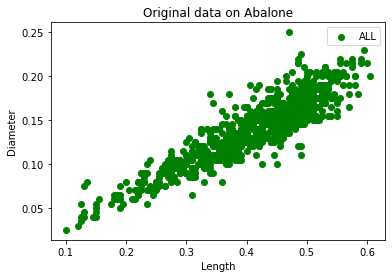

In [23]:
# 随机选取a和b作为坐标轴
#对Sex三个属性上色
plt.scatter(x = x_test[:,1], y = x_test[:,2], color = 'Green', label = 'ALL')
plt.xlabel('Length')
plt.ylabel('Diameter')
plt.title("Original data on Abalone")
plt.legend()
plt.show()

#### 图中展示的是还未预测的所有数据点集

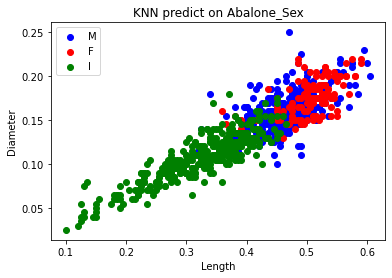

In [24]:
mPredict = []
fPredict = []
iPredict = []
for i in range(0, len(x_test)):
    if(y_predict[i] == 'M'):
        mPredict.append(x_test[i])
    if(y_predict[i] == 'F'):
        fPredict.append(x_test[i])
    if(y_predict[i] == 'I'):
        iPredict.append(x_test[i])
mPredict = np.array(mPredict)
fPredict = np.array(fPredict)
iPredict = np.array(iPredict)
plt.scatter(x = mPredict[:,1], y = mPredict[:,2], color = 'blue', label = 'M')
plt.scatter(x = fPredict[:,1], y = fPredict[:,2], color = 'red', label = 'F')
plt.scatter(x = iPredict[:,1], y = iPredict[:,2], color = 'green', label = 'I')
plt.xlabel('Length')
plt.ylabel('Diameter')
plt.title("KNN predict on Abalone_Sex")
plt.legend()
plt.show()

#### 图中共有三个预测分类

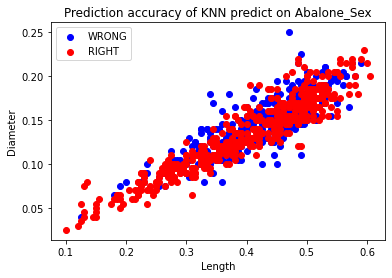

In [25]:
right = x_test[y_predict == y_test]
wrong = x_test[y_predict != y_test]
plt.scatter(x = wrong[:,1], y = wrong[:,2], color = 'blue', label = 'WRONG')
plt.scatter(x = right[:,1], y = right[:,2], color = 'red', label = 'RIGHT')
plt.xlabel('Length')
plt.ylabel('Diameter')
plt.title("Prediction accuracy of KNN predict on Abalone_Sex")
plt.legend()
plt.show()

#### 图中红色表示预测成功

## 2.对Rings进行预测

In [26]:
# 设置画布大小
plt.figure(figsize = (100, 100))

<Figure size 7200x7200 with 0 Axes>

<Figure size 7200x7200 with 0 Axes>

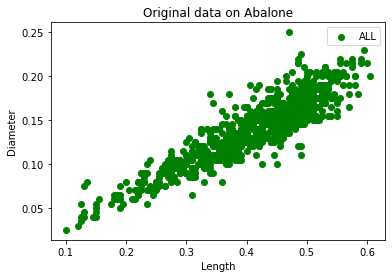

In [27]:
# 随机选取a和b作为坐标轴
#对Sex三个属性上色
plt.scatter(x = x_test[:,1], y = x_test[:,2], color = 'Green', label = 'ALL')
plt.xlabel('Length')
plt.ylabel('Diameter')
plt.title("Original data on Abalone")
plt.legend()
plt.show()

#### 图中展示的是还未预测的所有数据点集

In [28]:
aPredict = []
bPredict = []
cPredict = []
for i in range(0, len(x_test)):
    if(Y_predict[i] == '0'):
        aPredict.append(X_test[i])
    if(Y_predict[i] == '1'):
        bPredict.append(X_test[i])
    if(Y_predict[i] == '2'):
        cPredict.append(X_test[i])
aPredict = np.array(aPredict)
bPredict = np.array(bPredict)
cPredict = np.array(cPredict)

In [29]:
aPredict 

array([[0.44, 0.34, 0.1, ..., 0.188, 0.087, 0.13],
       [0.565, 0.435, 0.15, ..., 0.5795, 0.1825, 0.206],
       [0.37, 0.28, 0.105, ..., 0.0905, 0.0585, 0.075],
       ...,
       [0.435, 0.325, 0.105, ..., 0.136, 0.065, 0.115],
       [0.315, 0.235, 0.07, ..., 0.058, 0.0325, 0.047],
       [0.545, 0.42, 0.165, ..., 0.4235, 0.2195, 0.228]], dtype=object)

In [30]:
bPredict

array([[0.525, 0.39, 0.135, ..., 0.2265, 0.131, 0.21],
       [0.62, 0.485, 0.155, ..., 0.5105, 0.271, 0.352],
       [0.485, 0.375, 0.135, ..., 0.1925, 0.1315, 0.1685],
       ...,
       [0.555, 0.445, 0.175, ..., 0.551, 0.244, 0.2785],
       [0.665, 0.53, 0.18, ..., 0.6345, 0.342, 0.435],
       [0.6, 0.5, 0.155, ..., 0.6235, 0.2835, 0.35]], dtype=object)

In [31]:
cPredict

array([], dtype=float64)

##### ？？？0预测成功？

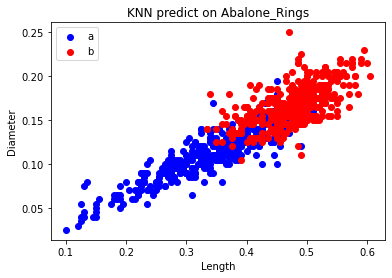

In [32]:
plt.scatter(x = aPredict[:,1], y = aPredict[:,2], color = 'blue', label = 'a')
plt.scatter(x = bPredict[:,1], y = bPredict[:,2], color = 'red', label = 'b')
#plt.scatter(x = cPredict[:,1], y = cPredict[:,2], color = 'green', label = 'c')
plt.xlabel('Length')
plt.ylabel('Diameter')
plt.title("KNN predict on Abalone_Rings")
plt.legend()
plt.show()

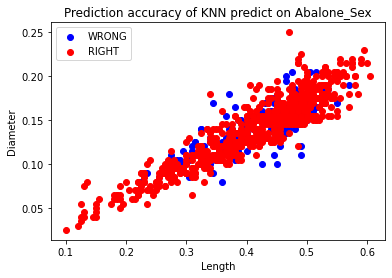

In [33]:
right1 = x_test[Y_predict == Y_test]
wrong1 = x_test[Y_predict != Y_test]
plt.scatter(x = wrong1[:,1], y = wrong1[:,2], color = 'blue', label = 'WRONG')
plt.scatter(x = right1[:,1], y = right1[:,2], color = 'red', label = 'RIGHT')
plt.xlabel('Length')
plt.ylabel('Diameter')
plt.title("Prediction accuracy of KNN predict on Abalone_Sex")
plt.legend()
plt.show()